## Task 1 Testing

Hyperparameter combination:   3%|▎         | 1/30 [02:38<1:16:25, 158.11s/it]

Stopped early at episode 9059 — policy stable for 50 episodes.


Hyperparameter combination:   7%|▋         | 2/30 [05:17<1:14:01, 158.63s/it]

Stopped early at episode 9108 — policy stable for 50 episodes.


Hyperparameter combination:  10%|█         | 3/30 [07:48<1:09:54, 155.35s/it]

Stopped early at episode 8698 — policy stable for 50 episodes.


Hyperparameter combination:  13%|█▎        | 4/30 [09:14<55:23, 127.82s/it]  

Stopped early at episode 4977 — policy stable for 50 episodes.


Hyperparameter combination:  17%|█▋        | 5/30 [11:08<51:13, 122.95s/it]

Stopped early at episode 6590 — policy stable for 50 episodes.


Hyperparameter combination:  20%|██        | 6/30 [12:36<44:22, 110.93s/it]

Stopped early at episode 5077 — policy stable for 50 episodes.


Hyperparameter combination:  23%|██▎       | 7/30 [12:52<30:40, 80.03s/it] 

Stopped early at episode 973 — policy stable for 50 episodes.


Hyperparameter combination:  27%|██▋       | 8/30 [13:25<23:53, 65.17s/it]

Stopped early at episode 1974 — policy stable for 50 episodes.


Hyperparameter combination:  30%|███       | 9/30 [13:56<19:03, 54.44s/it]

Stopped early at episode 1824 — policy stable for 50 episodes.


Hyperparameter combination:  33%|███▎      | 10/30 [15:43<23:33, 70.68s/it]

Stopped early at episode 5984 — policy stable for 50 episodes.


Hyperparameter combination:  37%|███▋      | 11/30 [17:30<25:51, 81.68s/it]

Stopped early at episode 5997 — policy stable for 50 episodes.


Hyperparameter combination:  40%|████      | 12/30 [19:30<28:02, 93.49s/it]

Stopped early at episode 6721 — policy stable for 50 episodes.


Hyperparameter combination:  43%|████▎     | 13/30 [20:34<23:58, 84.60s/it]

Stopped early at episode 3571 — policy stable for 50 episodes.


Hyperparameter combination:  47%|████▋     | 14/30 [21:53<22:04, 82.78s/it]

Stopped early at episode 4385 — policy stable for 50 episodes.


Hyperparameter combination:  50%|█████     | 15/30 [23:05<19:53, 79.54s/it]

Stopped early at episode 4019 — policy stable for 50 episodes.


Hyperparameter combination:  53%|█████▎    | 16/30 [23:22<14:09, 60.65s/it]

Stopped early at episode 939 — policy stable for 50 episodes.


Hyperparameter combination:  57%|█████▋    | 17/30 [24:04<11:57, 55.17s/it]

Stopped early at episode 2376 — policy stable for 50 episodes.


Hyperparameter combination:  60%|██████    | 18/30 [24:34<09:29, 47.45s/it]

Stopped early at episode 1645 — policy stable for 50 episodes.


Hyperparameter combination:  63%|██████▎   | 19/30 [25:21<08:40, 47.29s/it]

Stopped early at episode 2574 — policy stable for 50 episodes.


Hyperparameter combination:  67%|██████▋   | 20/30 [26:19<08:25, 50.60s/it]

Stopped early at episode 3251 — policy stable for 50 episodes.


Hyperparameter combination:  70%|███████   | 21/30 [27:11<07:38, 50.98s/it]

Stopped early at episode 2884 — policy stable for 50 episodes.


Hyperparameter combination:  73%|███████▎  | 22/30 [27:43<06:02, 45.32s/it]

Stopped early at episode 1779 — policy stable for 50 episodes.


Hyperparameter combination:  77%|███████▋  | 23/30 [27:56<04:09, 35.57s/it]

Stopped early at episode 706 — policy stable for 50 episodes.


Hyperparameter combination:  80%|████████  | 24/30 [28:39<03:46, 37.79s/it]

Stopped early at episode 2375 — policy stable for 50 episodes.


Hyperparameter combination:  83%|████████▎ | 25/30 [28:46<02:23, 28.69s/it]

Stopped early at episode 415 — policy stable for 50 episodes.


Hyperparameter combination:  87%|████████▋ | 26/30 [28:57<01:32, 23.23s/it]

Stopped early at episode 578 — policy stable for 50 episodes.


Hyperparameter combination:  90%|█████████ | 27/30 [29:07<00:58, 19.35s/it]

Stopped early at episode 575 — policy stable for 50 episodes.


Hyperparameter combination:  93%|█████████▎| 28/30 [29:20<00:34, 17.30s/it]

Stopped early at episode 689 — policy stable for 50 episodes.


Hyperparameter combination:  97%|█████████▋| 29/30 [29:28<00:14, 14.51s/it]

Stopped early at episode 439 — policy stable for 50 episodes.


Hyperparameter combination: 100%|██████████| 30/30 [29:38<00:00, 59.28s/it]


Stopped early at episode 584 — policy stable for 50 episodes.


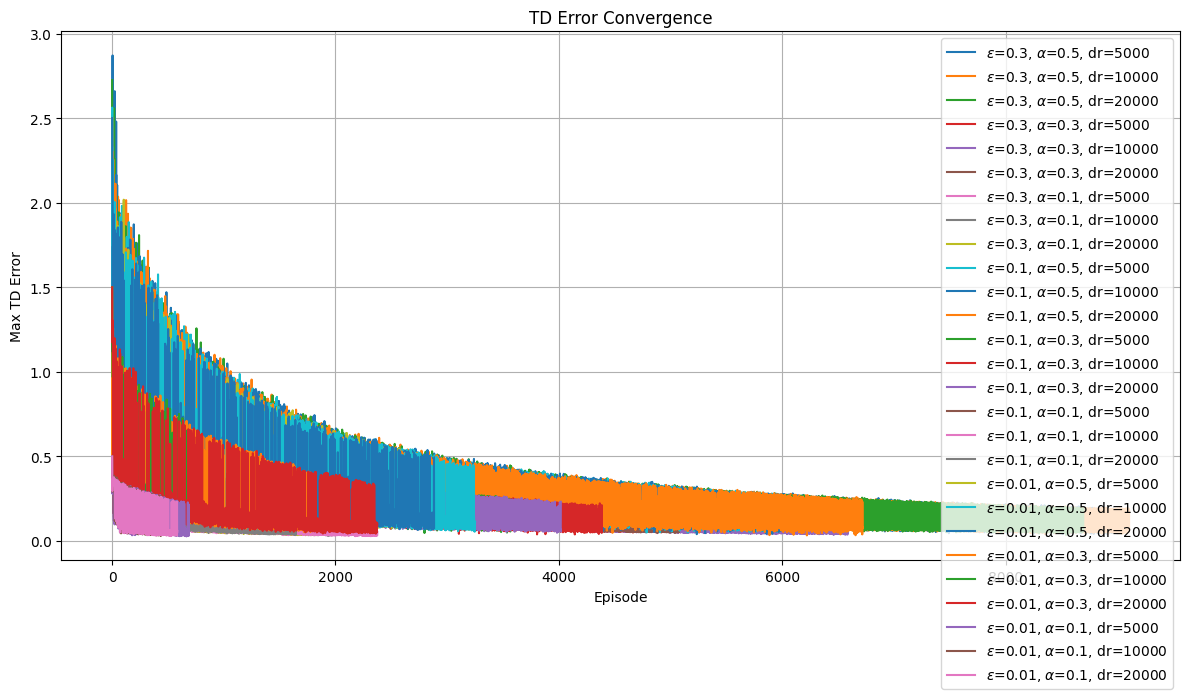

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm 

# Utility
np.random.seed(0)

def plot_td_errors(results, title="TD Error Convergence"):
    """
    Utility function to plot results (can be multiple)
    """
    plt.figure(figsize=(12, 7))
    for label, data in results.items():
        plt.plot(data["td_errors"], label=label)

    plt.xlabel("Episode")
    plt.ylabel("Max TD Error")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def print_policies_and_q_values(Q, label=None):
    """
    Utility function to print policies and corresponding Q values (can be multiple)
    """
    if label:
        print(f"\n===== Optimal Policy for {label} =====")
    print("Optimal Policy (0 = Do nothing, 1 = Maintenance):")
    for comp_type in range(len(xi)):
        policy = np.argmax(Q[comp_type], axis=0)
        policy[xi[comp_type]] = 1  # Force maintenance at threshold
        print(f"\nComponent Type {comp_type + 1} (Failure Threshold = {xi[comp_type]}):")
        print(policy)

    print("\nQ-values for each Component Type:")
    for comp_type in range(len(xi)):
        print(f"\nComponent Type {comp_type + 1} (Failure Threshold = {xi[comp_type]}):")
        print(Q[comp_type])

# Define MDP parameters
actions = (0, 1)  # (0=do nothing, 1=maintenance)
xi = (15, 30, 50) # break threshold per type of component
S = [list(range(x + 1)) for x in xi]
C = tuple([[0, 1]] * x + [[math.inf, 5]] for x in xi)
gamma = 0.9  # Discount factor

# Transition probabilities
p_zero = 0.5  # 50% probability of zero inflation
dist_name = 'poisson'  # Base distribution
lambda_poisson = 4  # Poisson mean

def zero_inflated_prob_vector(p_zero, dist_name, dist_params, s):
    """
    Computes a probability vector for a zero-inflated random variable.

    Parameters:
    - p_zero (float): Probability of zero inflation.
    - dist_name (str): Name of the base distribution ('poisson', 'nbinom', 'binom').
    - dist_params (tuple): Parameters of the base distribution.
    - s (int): Threshold for "s or greater" category.

    Returns:
    - np.array: Probability vector of length (s+1) where:
        - First element: P(X=0)
        - Second element: P(X=1)
        - ...
        - Second-to-last element: P(X=s-1)
        - Last element: P(X >= s)=1-(P(X=0)+...+P(X=s-1))
    """
    # Get the chosen probability mass function (PMF)
    base_dist = getattr(stats, dist_name)

    if s==0:
        prob_vector = [p_zero]
    else:
        # Compute probabilities for values 0 to (s-1)
        pmf_values = (1 - p_zero) * base_dist.pmf(np.arange(s), *dist_params)
        
        # Adjust probability of zero (includes zero-inflation)
        pmf_values[0] += p_zero
        
        # Compute probability for X ≥ s
        p_s_or_more = 1 - np.sum(pmf_values)
        
        # Append P(X >= s) as the last element
        prob_vector = np.append(pmf_values, p_s_or_more)
    
    return prob_vector

def choose_action(Q, comp_type, s, xi, epsilon):
    """
    Choose an action using an epsilon-greedy policy with a forced action at the threshold.

    Parameters:
     - Q         : Tuple of numpy arrays representing the Q-table for each component type.
     - comp_type : Integer index indicating the component type.
     - s         : Current state (an integer) for the selected component type.
     - xi        : Tuple containing the failure threshold for each component type.
     - epsilon   : Exploration probability.

    Returns:
     - a         : The chosen action (0 or 1). If s equals the threshold (xi[comp_type]), then returns 1.
    """
    # If state equals the failure threshold, force the maintenance action.
    if s == xi[comp_type]:
        return 1

    if np.random.random() < epsilon:
        return np.random.randint(2)
    else:
        return np.argmax(Q[comp_type][:, s])

def run_simulation(nEpisodes, lengthEpisode, initial_epsilon, initial_alpha, min_epsilon=0.01, decay_rate=5000, 
                   delta = 1e-5, patience=None):
    Q = tuple(np.zeros((2, x + 1)) for x in xi)
    td_errors = []
    
    prev_policy = None
    stable_count = 0
    
    for i in tqdm(range(nEpisodes), desc="Episodes"):
        # Decaying learning rate
        alpha = initial_alpha / (1 + i / 1000)
        epsilon = max(min_epsilon, initial_epsilon * np.exp(-i / decay_rate))

        # initialize S
        comp_type = np.random.randint(0, 3)
        s = S[comp_type][0]
        
        # Choose A from S using policy derived from Q
        a = choose_action(Q, comp_type, s, xi, epsilon)
        
        max_td_error = 0
        
        for j in range(0, lengthEpisode):
            if a == 0:
                prob_vector = zero_inflated_prob_vector(p_zero, dist_name, (lambda_poisson,), xi[comp_type]-s)
                increments = np.arange(len(prob_vector))
                increment = np.random.choice(increments, p=prob_vector)
                s_prime = s + increment
                if s_prime > xi[comp_type]:
                    s_prime = xi[comp_type]
                comp_type_prime = comp_type
            else:
                s_prime = 0
                comp_type_prime = np.random.randint(0, 3)
            
            r = -C[comp_type][s][a]
            
            a_prime = choose_action(Q, comp_type_prime, s_prime, xi, epsilon)

            # SARSA update
            td_error = r + gamma * Q[comp_type_prime][a_prime][s_prime] - Q[comp_type][a][s]
            Q[comp_type][a][s] += alpha * td_error
            
            if abs(alpha * td_error) > max_td_error:
                max_td_error = abs(alpha * td_error)
            
            # Update S and A for the next step
            s = s_prime
            comp_type = comp_type_prime
            a = a_prime
            
        td_errors.append(max_td_error)
        
        # Early stopping based on stable policy
        if patience is not None:
            current_policy = tuple(np.argmax(Q[comp], axis=0) for comp in range(len(Q)))
            for k, policy in enumerate(current_policy):
                policy[xi[k]] = 1  # Force maintenance at the threshold
            if prev_policy is not None and all(np.array_equal(cp, pp) for cp, pp in zip(current_policy, prev_policy)):
                stable_count += 1
                if stable_count >= patience:
                    print(f"Stopped early at episode {i+1} — policy stable for {patience} episodes.")
                    break
            else:
                stable_count = 0
                prev_policy = current_policy
        
        # Early stopping based on TD convergence
        if(max_td_error) < delta:
            return td_errors, Q
    
    return td_errors, Q

def run_all_hyperparam_combos(hyperparams, nEpisodes, lengthEpisode, printPolicies=False):
    results = {}

    for hp in tqdm(hyperparams, desc="Hyperparameter combination"):
        label = f"$\\epsilon$={hp['initial_epsilon']}, $\\alpha$={hp['initial_alpha']}, dr={hp['decay_rate']}"
        td_errors, Q = run_simulation(nEpisodes, lengthEpisode, hp['initial_epsilon'], hp['initial_alpha'], patience=50)
        results[label] = {"td_errors": td_errors, "Q": Q}

    plot_td_errors(results)

    if printPolicies:
        for label, data in results.items():
            print_policies_and_q_values(data["Q"], label)
    
    return results

# number and length of episodes (low for tuning)
nEpisodes = pow(10, 4)
lengthEpisode = 500

# Tuning of hyperparams
hyperparams = [{'initial_epsilon': 0.3, 'initial_alpha': 0.5, 'decay_rate': 5000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.5, 'decay_rate': 10000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.5, 'decay_rate': 20000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.3, 'decay_rate': 5000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.3, 'decay_rate': 10000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.3, 'decay_rate': 20000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.1, 'decay_rate': 5000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.1, 'decay_rate': 10000},
 {'initial_epsilon': 0.3, 'initial_alpha': 0.1, 'decay_rate': 20000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.5, 'decay_rate': 5000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.5, 'decay_rate': 10000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.5, 'decay_rate': 20000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.3, 'decay_rate': 5000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.3, 'decay_rate': 10000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.3, 'decay_rate': 20000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.1, 'decay_rate': 5000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.1, 'decay_rate': 10000},
 {'initial_epsilon': 0.1, 'initial_alpha': 0.1, 'decay_rate': 20000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.5, 'decay_rate': 5000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.5, 'decay_rate': 10000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.5, 'decay_rate': 20000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.3, 'decay_rate': 5000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.3, 'decay_rate': 10000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.3, 'decay_rate': 20000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.1, 'decay_rate': 5000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.1, 'decay_rate': 10000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.1, 'decay_rate': 20000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.1, 'decay_rate': 5000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.1, 'decay_rate': 10000},
 {'initial_epsilon': 0.01, 'initial_alpha': 0.1, 'decay_rate': 20000}]

# To run different hyperparameters for testing
results = run_all_hyperparam_combos(hyperparams, nEpisodes, lengthEpisode)

# Final tuned run
# nEpisodes = pow(10, 5)
# lengthEpisode = pow(10, 3)
# epsilon = 0.01
# alpha = 0.01
# td_errors, Q = run_simulation(nEpisodes, lengthEpisode, epsilon, alpha, patience=200)
# final_results = {f"$\\epsilon$={epsilon}, $\\alpha$={alpha}": {"td_errors": td_errors}}
# plot_td_errors(final_results, title="Final TD Error Convergence")
# print_policies_and_q_values(Q)

In [41]:
target_policy = [
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
    ]
for hp,data in results.items():
    Q = data['Q']
    pi = []
    for comp_type in range(len(xi)):
       policy = np.argmax(Q[comp_type], axis=0)
       policy[xi[comp_type]] = 1
       pi.append([int(i) for i in policy])
    #    print(hp,pi)
    # print(pi)
    if pi == target_policy:
        print(hp,pi)


$\epsilon$=0.3, $\alpha$=0.3, dr=5000 [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]
$\epsilon$=0.3, $\alpha$=0.1, dr=10000 [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]
$\epsilon$=0.3, $\alpha$=0.1, dr=20000 [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

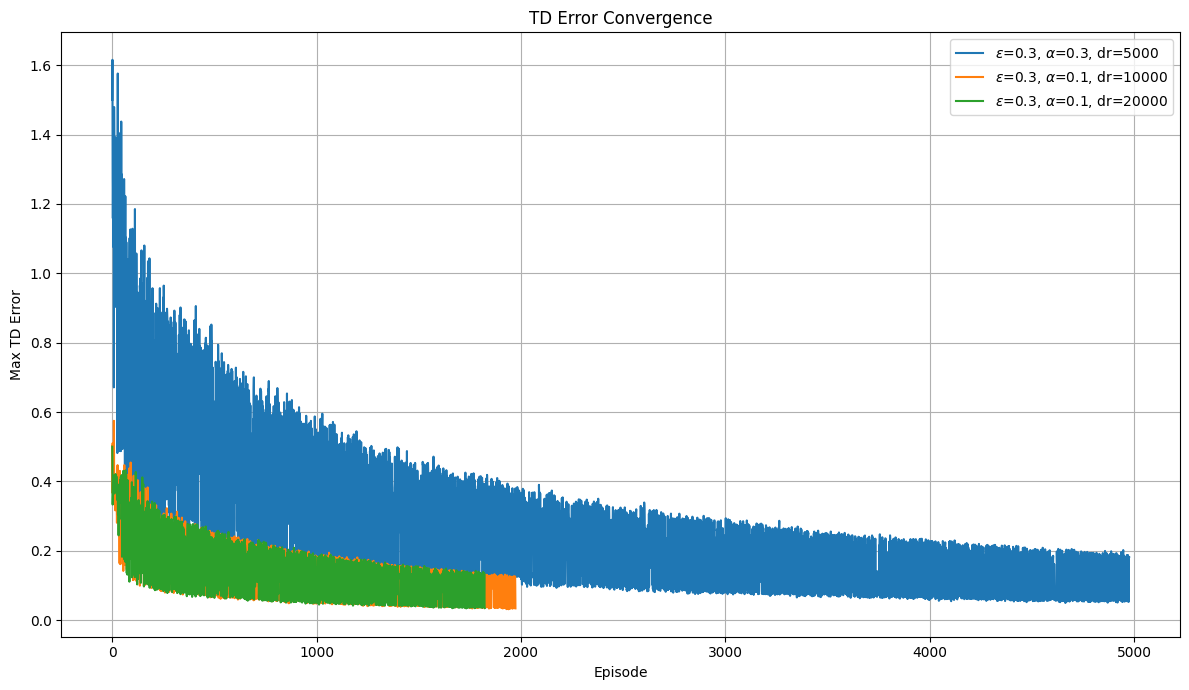

In [46]:
r = {r"$\epsilon$=0.3, $\alpha$=0.3, dr=5000":results[r"$\epsilon$=0.3, $\alpha$=0.3, dr=5000"],
r"$\epsilon$=0.3, $\alpha$=0.1, dr=10000":results[r"$\epsilon$=0.3, $\alpha$=0.1, dr=10000"],
r"$\epsilon$=0.3, $\alpha$=0.1, dr=20000":results[r"$\epsilon$=0.3, $\alpha$=0.1, dr=20000"]}

plot_td_errors(r)

Final Result

Episodes:   8%|▊         | 8358/100000 [04:37<50:40, 30.14it/s]

Stopped early at episode 8359 — policy stable for 200 episodes.


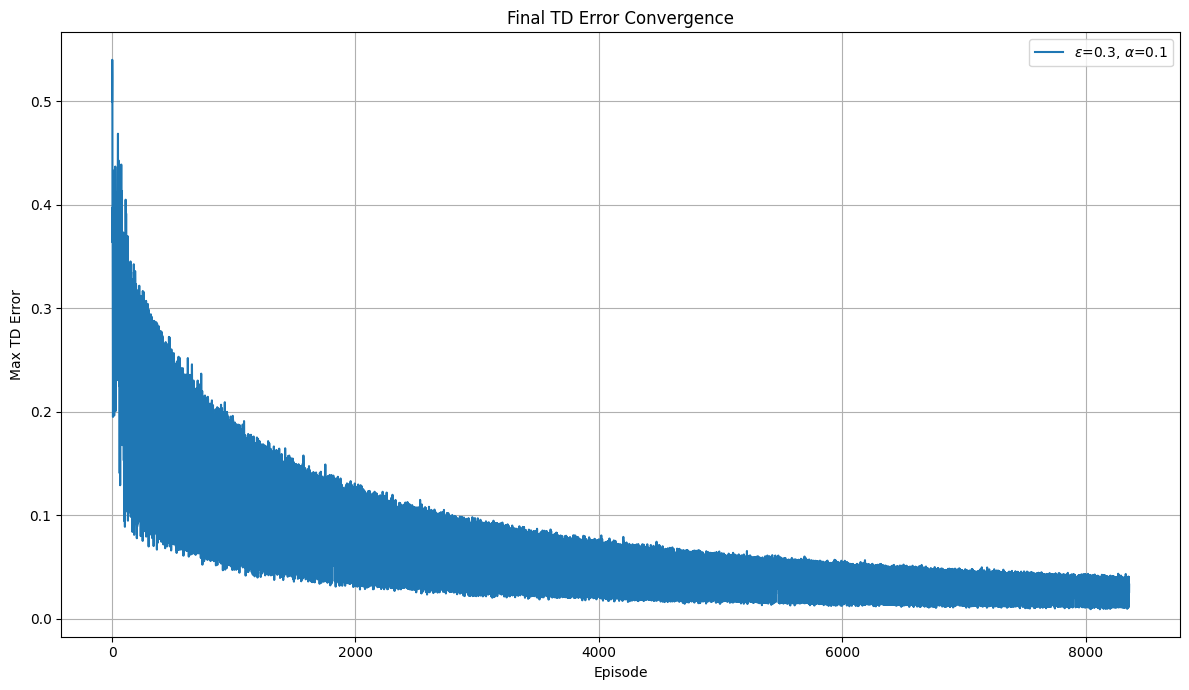

Optimal Policy (0 = Do nothing, 1 = Maintenance):

Component Type 1 (Failure Threshold = 15):
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]

Component Type 2 (Failure Threshold = 30):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]

Component Type 3 (Failure Threshold = 50):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1]

Q-values for each Component Type:

Component Type 1 (Failure Threshold = 15):
[[-1.56189809 -1.63395127 -1.69129348 -1.71221347 -1.82075148 -1.88030907
  -1.88024639 -2.09266479 -2.30474904 -2.37995055 -2.63930069 -2.938887
  -3.591887   -3.7599215  -4.10197824  0.        ]
 [-2.2721196  -2.26209582 -2.23624166 -2.26681742 -2.25844465 -2.29617596
  -2.19934932 -2.26003702 -2.23050693 -2.24947621 -2.24730497 -2.23461511
  -2.19430867 -2.26715451 -2.24075931 -6.24512314]]

Component Type 2 (Failure Threshold = 30):
[[-1.20466194 -1.19229099 -1.18530619 -1.23209065 -1.24764551 -1.30441125
  -1.3276457  -1.3205

In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm 

# Utility
np.random.seed(0)

def plot_td_errors(results, title="TD Error Convergence"):
    """
    Utility function to plot results (can be multiple)
    """
    plt.figure(figsize=(12, 7))
    for label, data in results.items():
        plt.plot(data["td_errors"], label=label)

    plt.xlabel("Episode")
    plt.ylabel("Max TD Error")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def print_policies_and_q_values(Q, label=None):
    """
    Utility function to print policies and corresponding Q values (can be multiple)
    """
    if label:
        print(f"\n===== Optimal Policy for {label} =====")
    print("Optimal Policy (0 = Do nothing, 1 = Maintenance):")
    for comp_type in range(len(xi)):
        policy = np.argmax(Q[comp_type], axis=0)
        policy[xi[comp_type]] = 1  # Force maintenance at threshold
        print(f"\nComponent Type {comp_type + 1} (Failure Threshold = {xi[comp_type]}):")
        print(policy)

    print("\nQ-values for each Component Type:")
    for comp_type in range(len(xi)):
        print(f"\nComponent Type {comp_type + 1} (Failure Threshold = {xi[comp_type]}):")
        print(Q[comp_type])

# Define MDP parameters
actions = (0, 1)  # (0=do nothing, 1=maintenance)
xi = (15, 30, 50) # break threshold per type of component
S = [list(range(x + 1)) for x in xi]
C = tuple([[0, 1]] * x + [[math.inf, 5]] for x in xi)
gamma = 0.9  # Discount factor

# Transition probabilities
p_zero = 0.5  # 50% probability of zero inflation
dist_name = 'poisson'  # Base distribution
lambda_poisson = 4  # Poisson mean

def zero_inflated_prob_vector(p_zero, dist_name, dist_params, s):
    """
    Computes a probability vector for a zero-inflated random variable.

    Parameters:
    - p_zero (float): Probability of zero inflation.
    - dist_name (str): Name of the base distribution ('poisson', 'nbinom', 'binom').
    - dist_params (tuple): Parameters of the base distribution.
    - s (int): Threshold for "s or greater" category.

    Returns:
    - np.array: Probability vector of length (s+1) where:
        - First element: P(X=0)
        - Second element: P(X=1)
        - ...
        - Second-to-last element: P(X=s-1)
        - Last element: P(X >= s)=1-(P(X=0)+...+P(X=s-1))
    """
    # Get the chosen probability mass function (PMF)
    base_dist = getattr(stats, dist_name)

    if s==0:
        prob_vector = [p_zero]
    else:
        # Compute probabilities for values 0 to (s-1)
        pmf_values = (1 - p_zero) * base_dist.pmf(np.arange(s), *dist_params)
        
        # Adjust probability of zero (includes zero-inflation)
        pmf_values[0] += p_zero
        
        # Compute probability for X ≥ s
        p_s_or_more = 1 - np.sum(pmf_values)
        
        # Append P(X >= s) as the last element
        prob_vector = np.append(pmf_values, p_s_or_more)
    
    return prob_vector

def choose_action(Q, comp_type, s, xi, epsilon):
    """
    Choose an action using an epsilon-greedy policy with a forced action at the threshold.

    Parameters:
     - Q         : Tuple of numpy arrays representing the Q-table for each component type.
     - comp_type : Integer index indicating the component type.
     - s         : Current state (an integer) for the selected component type.
     - xi        : Tuple containing the failure threshold for each component type.
     - epsilon   : Exploration probability.

    Returns:
     - a         : The chosen action (0 or 1). If s equals the threshold (xi[comp_type]), then returns 1.
    """
    # If state equals the failure threshold, force the maintenance action.
    if s == xi[comp_type]:
        return 1

    if np.random.random() < epsilon:
        return np.random.randint(2)
    else:
        return np.argmax(Q[comp_type][:, s])

def run_simulation(nEpisodes, lengthEpisode, initial_epsilon, initial_alpha, min_epsilon=0.01, decay_rate=5000, 
                   delta = 1e-5, patience=None):
    Q = tuple(np.zeros((2, x + 1)) for x in xi)
    td_errors = []
    
    prev_policy = None
    stable_count = 0
    
    for i in tqdm(range(nEpisodes), desc="Episodes"):
        # Decaying learning rate
        alpha = initial_alpha / (1 + i / 1000)
        epsilon = max(min_epsilon, initial_epsilon * np.exp(-i / decay_rate))

        # initialize S
        comp_type = np.random.randint(0, 3)
        s = S[comp_type][0]
        
        # Choose A from S using policy derived from Q
        a = choose_action(Q, comp_type, s, xi, epsilon)
        
        max_td_error = 0
        
        for j in range(0, lengthEpisode):
            if a == 0:
                prob_vector = zero_inflated_prob_vector(p_zero, dist_name, (lambda_poisson,), xi[comp_type]-s)
                increments = np.arange(len(prob_vector))
                increment = np.random.choice(increments, p=prob_vector)
                s_prime = s + increment
                if s_prime > xi[comp_type]:
                    s_prime = xi[comp_type]
                comp_type_prime = comp_type
            else:
                s_prime = 0
                comp_type_prime = np.random.randint(0, 3)
            
            r = -C[comp_type][s][a]
            
            a_prime = choose_action(Q, comp_type_prime, s_prime, xi, epsilon)

            # SARSA update
            td_error = r + gamma * Q[comp_type_prime][a_prime][s_prime] - Q[comp_type][a][s]
            Q[comp_type][a][s] += alpha * td_error
            
            if abs(alpha * td_error) > max_td_error:
                max_td_error = abs(alpha * td_error)
            
            # Update S and A for the next step
            s = s_prime
            a = a_prime
        
        td_errors.append(max_td_error)
        
        # Early stopping based on stable policy
        if patience is not None:
            current_policy = tuple(np.argmax(Q[comp], axis=0) for comp in range(len(Q)))
            for k, policy in enumerate(current_policy):
                policy[xi[k]] = 1  # Force maintenance at the threshold
            if prev_policy is not None and all(np.array_equal(cp, pp) for cp, pp in zip(current_policy, prev_policy)):
                stable_count += 1
                if stable_count >= patience:
                    print(f"Stopped early at episode {i+1} — policy stable for {patience} episodes.")
                    break
            else:
                stable_count = 0
                prev_policy = current_policy
        
        # Early stopping based on TD convergence
        if(max_td_error) < delta:
            return td_errors, Q
    
    return td_errors, Q

def run_all_hyperparam_combos(hyperparams, nEpisodes, lengthEpisode, printPolicies=False):
    results = {}

    for hp in tqdm(hyperparams, desc="Hyperparameter combination"):
        label = f"$\\epsilon$={hp['initial_epsilon']}, $\\alpha$={hp['initial_alpha']}"
        td_errors, Q = run_simulation(nEpisodes, lengthEpisode, hp['initial_epsilon'], hp['initial_alpha'], patience=30)
        results[label] = {"td_errors": td_errors, "Q": Q}

    plot_td_errors(results)

    if printPolicies:
        for label, data in results.items():
            print_policies_and_q_values(data["Q"], label)

# number and length of episodes (low for tuning)
nEpisodes = pow(10, 3)
lengthEpisode = pow(10, 2)

# Tuning of hyperparams
hyperparams = [
    {"initial_epsilon": 0.3, "initial_alpha": 0.3},
    {"initial_epsilon": 0.3, "initial_alpha": 0.1},
    {"initial_epsilon": 0.1, "initial_alpha": 0.3},
    {"initial_epsilon": 0.1, "initial_alpha": 0.1},
    {"initial_epsilon": 0.01, "initial_alpha": 0.1},
    {"initial_epsilon": 0.1, "initial_alpha": 0.01},
    {"initial_epsilon": 0.01, "initial_alpha": 0.01},
]
results = {}

# To run different hyperparameters for testing
#run_all_hyperparam_combos(hyperparams, nEpisodes, lengthEpisode)

# Final tuned run
nEpisodes = pow(10, 5)
lengthEpisode = pow(10, 3)
epsilon = 0.3
alpha = 0.1
decay_rate = 20_000
td_errors, Q = run_simulation(nEpisodes, lengthEpisode, epsilon, alpha, decay_rate=decay_rate, patience=200)
final_results = {f"$\\epsilon$={epsilon}, $\\alpha$={alpha}": {"td_errors": td_errors}}
plot_td_errors(final_results, title="Final TD Error Convergence")
print_policies_and_q_values(Q)

In [ ]:
# # OLD HP TESTING
# # number and length of episodes (low for tuning)
# nEpisodes = pow(10, 3)
# lengthEpisode = pow(10, 2)

# # Tuning of hyperparams
# hyperparams = [
#     {"initial_epsilon": 0.3, "initial_alpha": 0.3},
#     {"initial_epsilon": 0.3, "initial_alpha": 0.1},
#     {"initial_epsilon": 0.1, "initial_alpha": 0.3},
#     {"initial_epsilon": 0.1, "initial_alpha": 0.1},
#     {"initial_epsilon": 0.01, "initial_alpha": 0.1},
#     {"initial_epsilon": 0.1, "initial_alpha": 0.01},
#     {"initial_epsilon": 0.01, "initial_alpha": 0.01},
# ]
# results = {}

# # To run different hyperparameters for testing
# #run_all_hyperparam_combos(hyperparams, nEpisodes, lengthEpisode)